<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex01/gustavo_arantes/Atividade_01_IA025A_2022S1_Gustavo_da_Silva_Arantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [ ]:
print('Meu nome é: Gustavo da Silva Arantes')

Meu nome é: Gustavo da Silva Arantes


# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e `random`. Também pode-se usar o NumPy.

##Exercício 1.1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [ ]:
def top_k(L, k):
    from collections import Counter

    # Counter() é capaz de dado uma lista retornar um dicionário com a frequência de cada item
    dict_frequencia = dict(Counter(L)) 

    # ordenando o dicionário
    dict_frequencia = {key: value for key, value in sorted(dict_frequencia.items(), key=lambda item: item[1], reverse=True)}

    # selecionando os Top K mais frequentes 
    dict_frequencia = dict(list(dict_frequencia.items())[:k])

    return dict_frequencia

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [ ]:
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)
print(f'resultado: {resultado}')

resultado: {'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [ ]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [ ]:
%%timeit
resultado = top_k(L=L, k=k)

1 loop, best of 5: 547 ms per loop


## Exercício 1.2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [ ]:
def tokens_to_ids(text, vocabulary):
    import re

    # garantir que todas as letras sejam minúsculas
    text = text.lower()

    # expressão regular para dividir as frases e garantindo que a pontuação também será token
    text = re.findall(r"[^,.:;' ]+|[,.:;']", text)

    # atribuindo 'unknown' as palavras não conhecidas
    text = [i if i in vocabulary.keys() else 'unknown' for i in text]

    # conversão das chaves valores via função map()
    text = list(map(vocabulary.get, text))
    
    return text

Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [ ]:
%%timeit
resultado = tokens_to_ids(D, V)

1 loop, best of 5: 2.73 s per loop


## Exercício 1.3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [ ]:
def sample(path: str, k: int):
    import random

    # abre o arquivo que está em path e amostra K linhas aleatórias
    with open(path) as file:
        samples = random.sample(file.readlines(),k)

    # remove a string que representa a quebra de linha
    samples = [i.replace("\n", "") for i in samples]

    return samples

Mostre que sua implementação está correta com um exemplo pequeno:

In [ ]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 69', 'line 3', 'line 76', 'line 20', 'line 60', 'line 82', 'line 90', 'line 6', 'line 88', 'line 4']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [ ]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

10 loops, best of 5: 125 ms per loop


# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 2.1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

Resposta:
- número de somas: m x (n-1) x p
- número de multiplicações: m x n x p

## Exercício 2.2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [ ]:
import numpy as np

In [ ]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
# a lib numpy possui a função mean() que traz a média da matriz de maneira direta e sem utilizar loopings
A.mean(axis=1)

array([ 2.5,  8.5, 14.5, 20.5])

## Exercício 2.3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [ ]:
# as funções min() e max() geram os valores mínimos e máximos da matriz, respectivamente.
# a operação, como se escreve, é executada elemento a elemento
C = (A - A.min()) / (A.max() - A.min())
print(C)

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 2.4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [ ]:
# definir axis=0 permite encontrar o mínimo e máximo de cada coluna e retornar um novo array
# isso permite executar a operação elemento a elemento
print((A - A.min(axis=0)) / (A.max(axis=0) - A.min(axis=0)))


[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]


## Exercício 2.5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas.


In [ ]:
# definir axis=1 permite encontrar o mínimo e máximo de cada linha e retornar um novo array que possui uma única linha
# [:, np.newaxis] permite preservar os valores e alterar a dimensão da matriz para que ela possa estar em uma forma
# que permita a operação elemento a elemento
print((A - A.min(axis=1)[:, np.newaxis]) / ((A.max(axis=1) - A.min(axis=1)))[:, np.newaxis])

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 2.6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em apredizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [ ]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''

    # ao subtituir o valor máximo de cada linha de todos os elementos, é possível 
    # sanar o problema do estou exponencial pois o maior expoente será zero.
    A_adaptada = A - A.max(axis=1)[:, np.newaxis]

    # de maneira bem simplista a função softmax pode ser representada pela fórmula abaixo
    # softmax = exp()  /   sum( exp() )
    A_exponencial = np.exp(A_adaptada)    # numerador
    A_sum_exp = A_exponencial.sum(axis=1) # denominador
    A_exponencial = A_exponencial / A_sum_exp[:, np.newaxis]  # fração

    return A_exponencial

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [ ]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

O código a seguir verifica se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [ ]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [ ]:
%%timeit
softmax(A)

1 loop, best of 5: 272 ms per loop


In [ ]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 2.7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1

Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [ ]:
def one_hot(y, n_classes):

    # cria N_samples vetores com n_classes zeros
    one_hot_enc = np.zeros((y.shape[0], n_classes))

    # np.arange() determina a posição das linhas
    # y representa a posição da coluna
    # a composição dos dois indica quais células devem ser alteradas para 1
    # garantindo assim a codificação da matriz
    one_hot_enc[np.arange(y.shape[0]), y] = 1

    return one_hot_enc

In [ ]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)
print(y)
print(one_hot(y, N_CLASSES))

[6 5 4 3 5 2 6 5 7 8]
[[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
%%timeit
one_hot(y, N_CLASSES)

1 loop, best of 5: 206 ms per loop


## Exercício 2.8

Implemente uma classe que normalize um array de pontos flutuantes `array_a` para a mesma média e desvio padrão de um outro array `array_b`, conforme exemplo abaixo:
```
array_a = np.array([-1, 1.5, 0])
array_b = np.array([1.4, 0.8, 0.3, 2.5])
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)  # Deve imprimir [0.3187798  2.31425165 1.11696854]
```

In [ ]:
class Normalizer:
    def __init__(self, matriz_b):
        # obtendo a matriz de referência matriz_b
        # calculando os parâmetros de ajuste
        matriz_b = np.array(matriz_b)
        self.media = matriz_b.mean()
        self.despad = matriz_b.std()
        
    def __call__(self, matriz_a):
        # padronização da matriz_a, entrada do método __call__
        matriz_a = np.array(matriz_a)
        matriz_a = (matriz_a - matriz_a.mean()) / matriz_a.std()
        matriz_a = matriz_a * self.despad + self.media
        return matriz_a

Mostre que seu código está correto com o exemplo abaixo:

In [ ]:
array_a = [-1, 1.5, 0]
array_b = [1.4, 0.8, 0.3, 2.5]
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)

[0.3187798  2.31425165 1.11696854]


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [ ]:
import torch

In [ ]:
torch.__version__

'1.10.0+cu111'

**Tensor com atributo .requires_grad=True**

Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [ ]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [ ]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [ ]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

## Forward pass

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [ ]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Backward pass

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [ ]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [ ]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [ ]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 3.1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [ ]:
def J_func(w, x, y):
    # programe a função J_func, para facilitar
    J  = ((x * (w)) - y).pow(2).sum()
    return J

# Calcule o gradiente usando a regra diferenças finitas
# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
grad = (J_func(w+0.01, x, y) - J_func(w-0.01, x, y)) / (2 * 0.01)
print('grad=', grad)

grad= tensor(-28.0000)


##Exercício 3.2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

i = 0
J= tensor(14.)
grad = tensor(-28.0000)
w = tensor([1.2800])
i = 1
J= tensor(7.2576)
grad = tensor(-20.1600)
w = tensor([1.4816])
i = 2
J= tensor(3.7623)
grad = tensor(-14.5151)
w = tensor([1.6268])
i = 3
J= tensor(1.9504)
grad = tensor(-10.4509)
w = tensor([1.7313])
i = 4
J= tensor(1.0111)
grad = tensor(-7.5247)
w = tensor([1.8065])
i = 5
J= tensor(0.5242)
grad = tensor(-5.4178)
w = tensor([1.8607])
i = 6
J= tensor(0.2717)
grad = tensor(-3.9008)
w = tensor([1.8997])
i = 7
J= tensor(0.1409)
grad = tensor(-2.8086)
w = tensor([1.9278])
i = 8
J= tensor(0.0730)
grad = tensor(-2.0222)
w = tensor([1.9480])
i = 9
J= tensor(0.0379)
grad = tensor(-1.4560)
w = tensor([1.9626])
i = 10
J= tensor(0.0196)
grad = tensor(-1.0483)
w = tensor([1.9730])
i = 11
J= tensor(0.0102)
grad = tensor(-0.7548)
w = tensor([1.9806])
i = 12
J= tensor(0.0053)
grad = tensor(-0.5434)
w = tensor([1.9860])
i = 13
J= tensor(0.0027)
grad = tensor(-0.3913)
w = tensor([1.9899])
i = 14
J= tensor(0.0014)
grad = tensor(-0.2

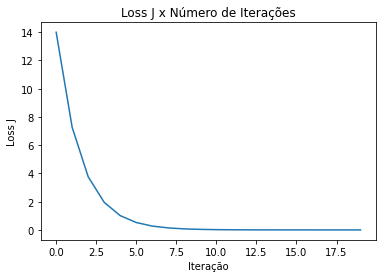

In [ ]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

loss = []
for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    loss.append(J)
    print('J=', J)
    grad = (J_func(w+0.01, x, y) - J_func(w-0.01, x, y)) / (2 * 0.01)
    print('grad =',grad)
    w = w - learning_rate*grad
    print('w =', w)
    
# Plote o gráfico da loss J pela iteração i
import matplotlib.pyplot as plt
plt.title('Loss J x Número de Iterações')
plt.xlabel('Iteração')
plt.ylabel('Loss J')
plt.plot(range(iteracoes), loss);

##Exercício 3.3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


i = 0
J= tensor(14., grad_fn=<SumBackward0>)
grad = tensor([-28.])
w = tensor([1.2800], requires_grad=True)
i = 1
J= tensor(7.2576, grad_fn=<SumBackward0>)
grad = tensor([-20.1600])
w = tensor([1.4816], requires_grad=True)
i = 2
J= tensor(3.7623, grad_fn=<SumBackward0>)
grad = tensor([-14.5152])
w = tensor([1.6268], requires_grad=True)
i = 3
J= tensor(1.9504, grad_fn=<SumBackward0>)
grad = tensor([-10.4509])
w = tensor([1.7313], requires_grad=True)
i = 4
J= tensor(1.0111, grad_fn=<SumBackward0>)
grad = tensor([-7.5247])
w = tensor([1.8065], requires_grad=True)
i = 5
J= tensor(0.5241, grad_fn=<SumBackward0>)
grad = tensor([-5.4178])
w = tensor([1.8607], requires_grad=True)
i = 6
J= tensor(0.2717, grad_fn=<SumBackward0>)
grad = tensor([-3.9008])
w = tensor([1.8997], requires_grad=True)
i = 7
J= tensor(0.1409, grad_fn=<SumBackward0>)
grad = tensor([-2.8086])
w = tensor([1.9278], requires_grad=True)
i = 8
J= tensor(0.0730, grad_fn=<SumBackward0>)
grad = tensor([-2.0222])
w = tensor([1.9480

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


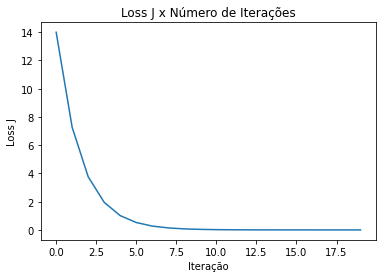

In [ ]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)

loss = []
for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    loss.append(J)
    print('J=', J)
    J.backward()
    grad = w.grad
    print('grad =',grad)
#     w = w - learning_rate*grad
    w = torch.tensor(w - learning_rate*grad, requires_grad=True)
    print('w =', w)

# Plote aqui a loss pela iteração
import matplotlib.pyplot as plt
plt.title('Loss J x Número de Iterações')
plt.xlabel('Iteração')
plt.ylabel('Loss J')
plt.plot(range(iteracoes), [i.detach() for i in loss]);

##Exercício 3.4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

Resposta: Dado uma função f(x) da qual queremos saber a derivada em um ponto xi. O resultado da derivada é igual a inclinação da reta tangente aquela função no ponto xi. <br>
Se tentarmos encontrar uma reta paralela a essa tangente a fim de determinar a inclinação, podemos na mesma função encontrar uma nova tangente de um outro ponto x(i+1).<br>
$\Delta w$ é dado como a diferença entre x(i) e x(i+1). Quanto maior esse valor menor será a precisão de nossa estimativa. Porém, quanto mais próximos os pontos, mais próximos serão as inclinações e mais precisa será nossa estimativa ($\Delta w$ muito pequeno) <br>
Sendo assim, devemos utilizar valores pequenos para $\Delta w$ e diferentes de zero.

##Exercício 3.5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a) No método de diferenças finitas seria necessário realizar N derivadas parciais que calculariam $(x_i w - y_i)^2$ que possui custo N. Sendo assim, pode-se constatar que o custo seria $O(N²)$

b) Através do método de backpropagation, o calculo é realizado uma única vez, garantindo que o custo computacional seja próximo a $O(N)$

##Exercício 3.6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

Resposta:
* Para uma única classe y = [1,0,0,...,0]
* Na inicialização automática todos elementos tem a mesma probabilidade: $ p_j = \frac{1}{K} $
* Com algumas manipulações matemáticas tem-se:
$$L = - \log \frac{1}{K} $$

Fim do notebook.